Task 1

Load the classification dataset. [Dataset = Biomechanical features of orthopedic patients]. Load the
dataset using pandas. Explore the dataset using pandas methods such as head(), info(), and describe().

In [ ]:
import pandas as pd
url = 'column_2C_weka.csv'
data = pd.read_csv(url)
#data.columns=["pelvic_incidence", "pelvic_tilt numeric", "lumbar_lordosis_angle", "sacral_slope", "pelvic_radius", "degree_spondylolisthesis", "class"]
print(data.head())
data.describe()


   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027817            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Task 2

Import the necessary libraries

In [ ]:
import numpy as np
import random
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

Task 3

Initialize weights and bias as 0:

In [ ]:
def weightInitialization(n_features):
    w = np.zeros((n_features,1))
    b = 0.0

    return w, b

Task 4

Sigmoid Function:

In [ ]:
def sigmoid_activation(z):
    y = 1 / (1 + np.exp(-z))
    return y


Task 5

Model Optimization Function:

In [ ]:
def model_optimize(w, b, X, Y):
    # Get the number of training examples (m)
    m = X.shape[1]

    # Compute the linear transformation and apply the sigmoid activation function
    Z = np.dot(w.T, X) + b
    A = sigmoid_activation(Z)

    # Calculate the binary cross-entropy cost
    cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # Compute the gradients of the cost with respect to the parameters
    dw = (1/m) * np.dot(X, (A - Y).T)
    db = (1/m) * np.sum(A - Y)

    # Store the gradients in a dictionary for later use
    grads = {"dw": dw, "db": db}

    return grads, cost


Task 6

Run the optimization function for a given number of epochs and get the final weights along with a
list of cost for each epoch

In [ ]:
def model_fit(w, b, X, Y, learning_rate, no_iterations):
    # Initialize a list to store the cost values at certain intervals
    costs = []

    # Loop for the specified number of iterations
    for i in range(no_iterations):
        # Compute gradients and cost using the model_optimize function
        grads, cost = model_optimize(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]

        # Update the parameters w and b using gradient descent
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Append the cost to the costs list at regular intervals (every 10 iterations)
        if (i % 10 == 0):
            costs.append(cost)

    # Store the optimized parameters w and b in a dictionary
    coeff = {"w": w, "b": b}

    return coeff, costs



Task 7

Use logistic regression for your dataset:

In [ ]:
 # split the data in train and test split in 70:30 ratio

 # Get the best weights and bias

 # Use those to get the predictions for the test dataset

 # Finally check the accuracy score

# Initialize a MinMaxScaler for feature scaling
scaler = MinMaxScaler()

# Prepare the input features (X) and target labels (Y)
X = data.drop(columns=['class']).values
X = scaler.fit_transform(X)

# Create a class mapping for 'Abnormal' and 'Normal' classes
class_mapping = {"Abnormal": 1, "Normal": 0}
Y = data['class'].map(class_mapping).values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Reshape the target labels for later use
Y_train = Y_train.reshape(1, -1)
Y_test = Y_test.reshape(1, -1)

# Get the number of features
n_features = X_train.shape[1]

# Initialize weights and bias using a function (not shown in the provided code)
w, b = weightInitialization(n_features)

# Set learning rate and number of iterations
learning_rate = 0.01
no_iterations = 1000

# Train the model using the model_fit function
coeff, costs = model_fit(w, b, X_train.T, Y_train, learning_rate, no_iterations)
w = coeff["w"]
b = coeff["b"]

# Make predictions on the test data
Z = np.dot(w.T, X_test.T) + b
A = sigmoid_activation(Z)
A = (A > 0.5).astype(int)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(Y_test.T, A.T)
print("Accuracy:", accuracy)




Accuracy: 0.7419354838709677


Task 8

Use the costs list to plot the cost vs. epoch curve.

Text(0, 0.5, 'Cost')

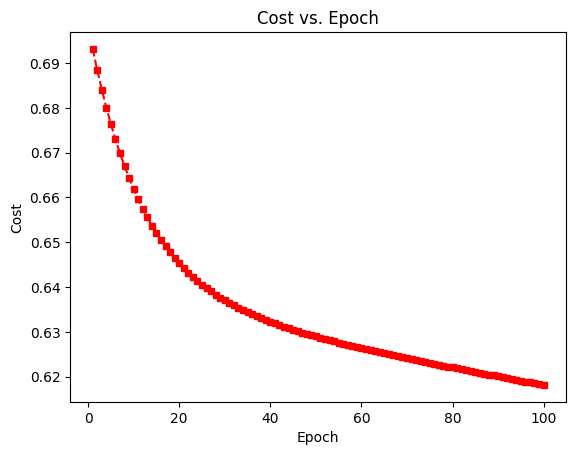

In [ ]:
epochs = range(1, len(costs) + 1)
plt.plot(epochs, costs, marker='s', linestyle='--', color='r', markersize=5, label='Training Cost')
plt.title('Cost vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Cost')

Task 9

Show how the accuracy of the test dataset changes when you use 10%, 20%, and so on of the training
dataset.

In [ ]:
# Define a list of test data percentages
percentages = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# Initialize an empty list to store accuracy values
accuracy_values = []

# Iterate over different test data percentages
for percent in percentages:
    # Split the data into training and testing sets based on the percentage
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=percent/100, random_state=42)

    # Reshape the target arrays to have the right shape
    Y_train = Y_train.reshape(1, -1)
    Y_test = Y_test.reshape(1, -1)

    # Get the number of features in the input data
    n_features = X_train.shape[1]

    # Initialize model weights and bias
    w, b = weightInitialization(n_features)

    # Train the model on the training data
    coeff, costs = model_fit(w, b, X_train.T, Y_train, learning_rate=0.01, no_iterations=500)
    w = coeff["w"]
    b = coeff["b"]

    # Make predictions on the test data
    Z = np.dot(w.T, X_test.T) + b
    A = sigmoid_activation(Z)
    A = A > 0.5

    # Calculate and store the accuracy of the model on the test data
    accuracy_values.append(accuracy_score(Y_test.T, A.T))

# Create a DataFrame to store the results
results = pd.DataFrame({'Training Data%': [100 - percent for percent in percentages],
                        'Test Data%': percentages,
                        'Accuracy': accuracy_values})

# Print the results
print(results)


   Training Data%  Test Data%  Accuracy
0              90          10  0.741935
1              80          20  0.709677
2              70          30  0.741935
3              60          40  0.733871
4              50          50  0.709677
5              40          60  0.709677
6              30          70  0.691244
7              20          80  0.677419
8              10          90  0.673835


Task 10

L1 L2 Regularization:
Adapt the function model_optimize to include regularization.

In [ ]:
def model_optimize_with_regularization(w, b, X, Y, learning_rate, no_iterations, reg, lambda_):
    # Get the number of training examples (m)
    m = X.shape[1]

    # Compute the linear transformation and apply the sigmoid activation function
    Z = np.dot(w.T, X) + b
    A = 1 / (1 + np.exp(-Z))

    # Calculate the cost with regularization
    if reg == 'L1':
        # L1 regularization term added to the cost
        cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + lambda_/(2*m) * np.sum(np.abs(w))
    elif reg == 'L2':
        # L2 regularization term added to the cost
        cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) + lambda_/(2*m) * np.sum(w**2)

    # Calculate gradients
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    # Store the gradients in a dictionary
    grads = {"dw": dw, "db": db}

    return grads, cost


Task 11

Accuracy change with regularization :

Train the model for different epochs, different regularization (none, L1, L2) and different regulariza-
tion coefficient values then show the test accuracies found in a table.

In [ ]:
def model_fit_with_regularization(w, b, X, Y, learning_rate, epochs, reg, lambda_):
    # Initialize a list to store the cost values at certain intervals
    costs = []

    # Loop for the specified number of epochs
    for i in range(epochs):
        # Compute gradients and cost using the model_optimize_with_regularization function
        grads, cost = model_optimize_with_regularization(w, b, X, Y, learning_rate, epochs, reg, lambda_)
        dw = grads["dw"]
        db = grads["db"]

        # Update the parameters w and b using gradient descent
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Append the cost to the costs list at regular intervals (every 10 iterations)
        if i % 10 == 0:
            costs.append(cost)

    # Store the optimized parameters w and b in a dictionary
    coeff = {"w": w, "b": b}

    return coeff, costs



In [ ]:
# Define a list of lambda (regularization) values and epoch values
lambda_values = [0.001, 0.01, 0.1]
epoch_values = [100, 500, 1000]

# Initialize an empty list to store the results
results = []

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Reshape the target arrays to have the right shape
Y_train = Y_train.reshape(1, -1)
Y_test = Y_test.reshape(1, -1)

# Get the number of features in the input data
n_features = X_train.shape[1]

# Initialize model weights and bias
w, b = weightInitialization(n_features)

# Set the learning rate
learning_rate = 0.01

# Loop over regularization types (L1 and L2)
for reg_type in ["L1", "L2"]:
    for lambda_val in lambda_values:
        for epochs in epoch_values:
            # Train the model with regularization and obtain coefficients and cost
            coeff, cost = model_fit_with_regularization(w, b, X_train.T, Y_train, learning_rate, epochs, reg_type, lambda_val)
            w = coeff["w"]
            b = coeff["b"]

            # Make predictions on the test set
            Z = np.dot(w.T, X_test.T) + b
            A = sigmoid_activation(Z)
            A = A > 0.5

            # Calculate accuracy and store the results in a DataFrame
            accuracy = accuracy_score(Y_test.T, A.T)
            config = pd.DataFrame({'Type': [reg_type],
                                    'Coefficient': [lambda_val],
                                    'Epochs': [epochs],
                                    'Accuracy': [accuracy]})

            results.append(config)

# Concatenate the results into a single DataFrame
results = pd.concat(results, ignore_index=True)

# Print the results
print(results)


   Type  Coefficient  Epochs  Accuracy
0    L1        0.001     100  0.741935
1    L1        0.001     500  0.741935
2    L1        0.001    1000  0.741935
3    L1        0.010     100  0.741935
4    L1        0.010     500  0.741935
5    L1        0.010    1000  0.741935
6    L1        0.100     100  0.741935
7    L1        0.100     500  0.763441
8    L1        0.100    1000  0.774194
9    L2        0.001     100  0.784946
10   L2        0.001     500  0.784946
11   L2        0.001    1000  0.806452
12   L2        0.010     100  0.795699
13   L2        0.010     500  0.795699
14   L2        0.010    1000  0.806452
15   L2        0.100     100  0.806452
16   L2        0.100     500  0.827957
17   L2        0.100    1000  0.827957


Task 12

Logistic Regression Class from sklearn library:
Use the Logistic Regression model from the sklearn library and find the accuracy after training.

In [ ]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

predictions = logistic_regression.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)


print("Accuracy:",accuracy)

Accuracy: 0.7956989247311828


Task 13

Decision Trees from sklearn library:
Use the Decision Tree model from the sklearn library and find the accuracy after training.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)


predictions = decision_tree.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)

print("Accuracy:",accuracy)

Accuracy: 0.8279569892473119


Task 14

Naive Bayes from sklearn library:
Use the Naive Bayes model from the sklearn library and find the accuracy after training.

In [ ]:
from sklearn.naive_bayes import GaussianNB


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)


predictions = naive_bayes.predict(X_test)
accuracy = accuracy_score(Y_test, predictions)

print("Accuracy:",accuracy)

Accuracy: 0.7956989247311828
